In [1]:
import pandas as pd
import plotly
import openpyxl
import cs_demand_model

from cs_demand_model.prediction import ModelPredictor, calculate_rate_from_numbers

In [2]:
pd.set_option('display.max_rows', None)
pd.options.plotting.backend = "plotly"


In [3]:
filename = "../data/output.xlsx"

In [4]:
stock = pd.read_excel(filename)

column_name = stock.columns[1]
stock.columns = ['bin', 'date']
stock['bin'] = stock.bin.apply(lambda x: eval(x))
stock.set_index('bin', inplace=True)
stock = stock.date
stock.name = column_name
stock

bin
(BIRTH_TO_ONE, FOSTERING)              29
(BIRTH_TO_ONE, OTHER)                   8
(FIVE_TO_TEN, FOSTERING)              173
(FIVE_TO_TEN, OTHER)                    9
(FIVE_TO_TEN, RESIDENTIAL)             14
(ONE_TO_FIVE, FOSTERING)               61
(ONE_TO_FIVE, OTHER)                   16
(SIXTEEN_TO_EIGHTEEN, FOSTERING)       21
(SIXTEEN_TO_EIGHTEEN, OTHER)            2
(SIXTEEN_TO_EIGHTEEN, RESIDENTIAL)      6
(SIXTEEN_TO_EIGHTEEN, SUPPORTED)       33
(TEN_TO_SIXTEEN, FOSTERING)           150
(TEN_TO_SIXTEEN, OTHER)                18
(TEN_TO_SIXTEEN, RESIDENTIAL)          43
(TEN_TO_SIXTEEN, SUPPORTED)             4
Name: 2020-01-01 00:00:00, dtype: int64

In [5]:
transition_rates = pd.read_excel(filename, sheet_name="transition_rates")
transition_rates.columns = ['from', 'to', 'transition_rate']
transition_rates['from'] = transition_rates['from'].fillna(method="ffill")
transition_rates['from'] = transition_rates['from'].apply(lambda x: eval(x))
transition_rates['to'] = transition_rates['to'].apply(lambda x: eval(x))
transition_rates.set_index(['from', 'to'], inplace=True)
transition_rates = transition_rates.transition_rate
transition_rates

from                                to                                
(BIRTH_TO_ONE, FOSTERING)           (BIRTH_TO_ONE, FOSTERING)             0.003167
                                    (BIRTH_TO_ONE, NOT_IN_CARE)           0.001484
                                    (BIRTH_TO_ONE, OTHER)                 0.001704
(BIRTH_TO_ONE, OTHER)               (BIRTH_TO_ONE, FOSTERING)             0.001875
                                    (BIRTH_TO_ONE, NOT_IN_CARE)           0.004796
                                    (BIRTH_TO_ONE, OTHER)                 0.001696
(FIVE_TO_TEN, FOSTERING)            (FIVE_TO_TEN, FOSTERING)              0.001676
                                    (FIVE_TO_TEN, NOT_IN_CARE)            0.000200
                                    (FIVE_TO_TEN, OTHER)                  0.000107
                                    (FIVE_TO_TEN, RESIDENTIAL)            0.000092
(FIVE_TO_TEN, OTHER)                (FIVE_TO_TEN, FOSTERING)              0.000000
                

In [6]:
daily_entrants = pd.read_excel(filename, sheet_name="daily_entrants")
daily_entrants.columns = ['from', 'to', 'transition_rate']
daily_entrants['from'] = daily_entrants['from'].fillna(method="ffill")
daily_entrants['from'] = daily_entrants['from'].apply(lambda x: eval(x))
daily_entrants['to'] = daily_entrants['to'].apply(lambda x: eval(x))
daily_entrants.set_index(['from', 'to'], inplace=True)
daily_entrants = daily_entrants.transition_rate 
daily_entrants

from  to                                
()    (BIRTH_TO_ONE, FOSTERING)             0.087671
      (BIRTH_TO_ONE, OTHER)                 0.019178
      (FIVE_TO_TEN, FOSTERING)              0.084932
      (FIVE_TO_TEN, RESIDENTIAL)            0.002740
      (ONE_TO_FIVE, FOSTERING)              0.084932
      (SIXTEEN_TO_EIGHTEEN, FOSTERING)      0.024658
      (SIXTEEN_TO_EIGHTEEN, OTHER)          0.005479
      (SIXTEEN_TO_EIGHTEEN, RESIDENTIAL)    0.008219
      (SIXTEEN_TO_EIGHTEEN, SUPPORTED)      0.046575
      (TEN_TO_SIXTEEN, FOSTERING)           0.128767
      (TEN_TO_SIXTEEN, OTHER)               0.002740
      (TEN_TO_SIXTEEN, RESIDENTIAL)         0.005479
      (TEN_TO_SIXTEEN, SUPPORTED)           0.008219
Name: transition_rate, dtype: float64

In [7]:
mock_entrants = pd.DataFrame([
    ['()', "('ONE_TO_FIVE', 'FOSTERING')", 0], 
    ['()', "('FIVE_TO_TEN', 'FOSTERING')", 0.05], 
    ['()', "('TEN_TO_SIXTEEN', 'FOSTERING')", 0.02], 
], columns=['from', 'to', 'transition_rate']).set_index(['from', 'to']).transition_rate 

mock_entrants

from  to                             
()    ('ONE_TO_FIVE', 'FOSTERING')       0.00
      ('FIVE_TO_TEN', 'FOSTERING')       0.05
      ('TEN_TO_SIXTEEN', 'FOSTERING')    0.02
Name: transition_rate, dtype: float64

# Run prediction

We can now run predictions either combined, or separately. We try first to run prediction for only daily entrants since that's what we're most interested in

In [33]:
calculate_rate_from_numbers(stock, daily_entrants) * 30

from  to                                
()    (BIRTH_TO_ONE, FOSTERING)             2.630137
      (BIRTH_TO_ONE, OTHER)                 0.575342
      (FIVE_TO_TEN, FOSTERING)              2.547945
      (FIVE_TO_TEN, RESIDENTIAL)            0.082192
      (ONE_TO_FIVE, FOSTERING)              2.547945
      (SIXTEEN_TO_EIGHTEEN, FOSTERING)      0.739726
      (SIXTEEN_TO_EIGHTEEN, OTHER)          0.164384
      (SIXTEEN_TO_EIGHTEEN, RESIDENTIAL)    0.246575
      (SIXTEEN_TO_EIGHTEEN, SUPPORTED)      1.397260
      (TEN_TO_SIXTEEN, FOSTERING)           3.863014
      (TEN_TO_SIXTEEN, OTHER)               0.082192
      (TEN_TO_SIXTEEN, RESIDENTIAL)         0.164384
      (TEN_TO_SIXTEEN, SUPPORTED)           0.246575
Name: rate, dtype: float64

In [34]:
r = calculate_rate_from_numbers(stock, daily_entrants)
r = 1 - (1 - r) ** 30
r

from  to                                
()    (BIRTH_TO_ONE, FOSTERING)             0.936241
      (BIRTH_TO_ONE, OTHER)                 0.440623
      (FIVE_TO_TEN, FOSTERING)              0.930240
      (FIVE_TO_TEN, RESIDENTIAL)            0.079009
      (ONE_TO_FIVE, FOSTERING)              0.930240
      (SIXTEEN_TO_EIGHTEEN, FOSTERING)      0.527160
      (SIXTEEN_TO_EIGHTEEN, OTHER)          0.151967
      (SIXTEEN_TO_EIGHTEEN, RESIDENTIAL)    0.219323
      (SIXTEEN_TO_EIGHTEEN, SUPPORTED)      0.760893
      (TEN_TO_SIXTEEN, FOSTERING)           0.984003
      (TEN_TO_SIXTEEN, OTHER)               0.079009
      (TEN_TO_SIXTEEN, RESIDENTIAL)         0.151967
      (TEN_TO_SIXTEEN, SUPPORTED)           0.219323
Name: rate, dtype: float64

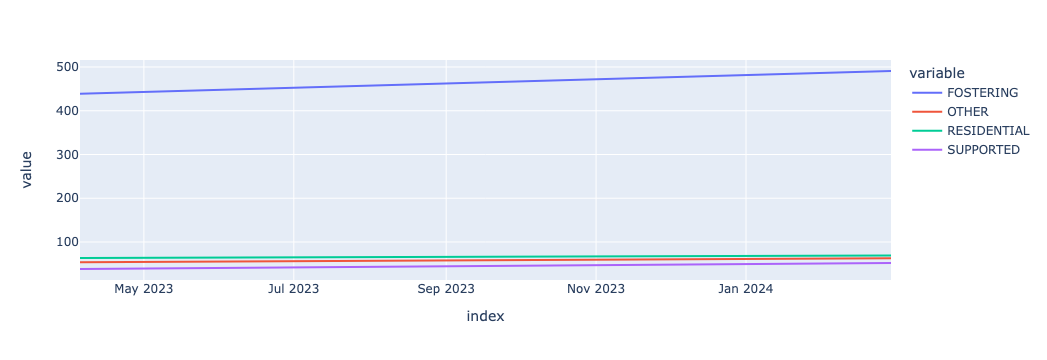

In [35]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=12, step_days=30)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

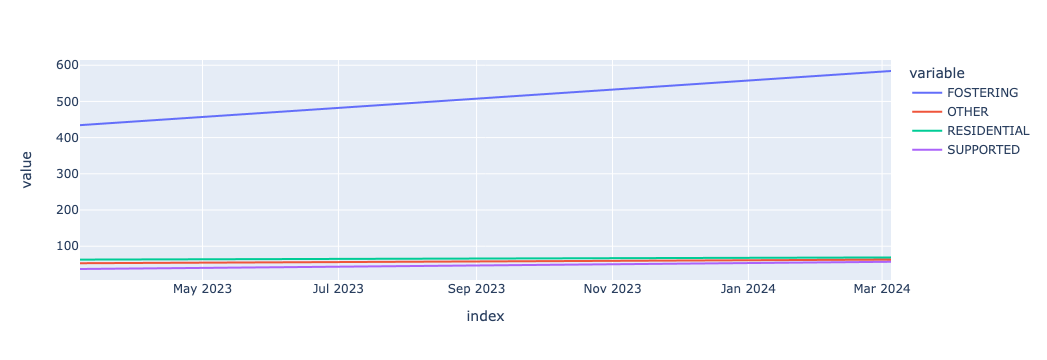

In [38]:
predictor = ModelPredictor(population=stock, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=365, step_days=1)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

We can do the same for just the transition rates

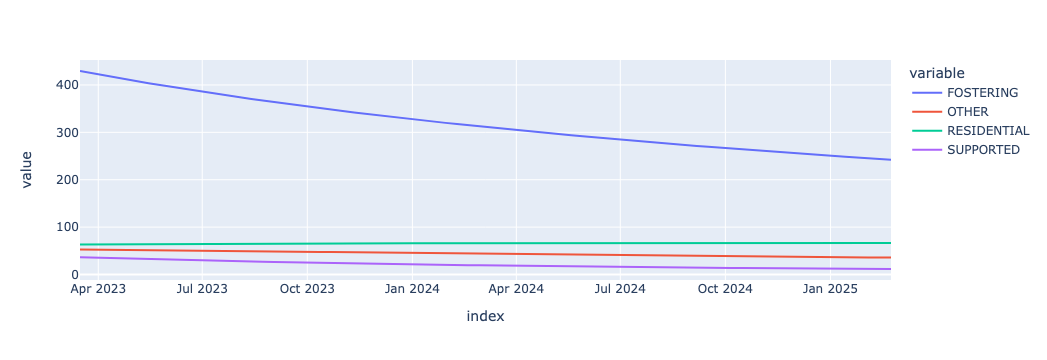

In [36]:
predictor = ModelPredictor(population=stock, transition_rates=transition_rates)
forecast = predictor.predict(steps=72, step_days=10)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

Now combined

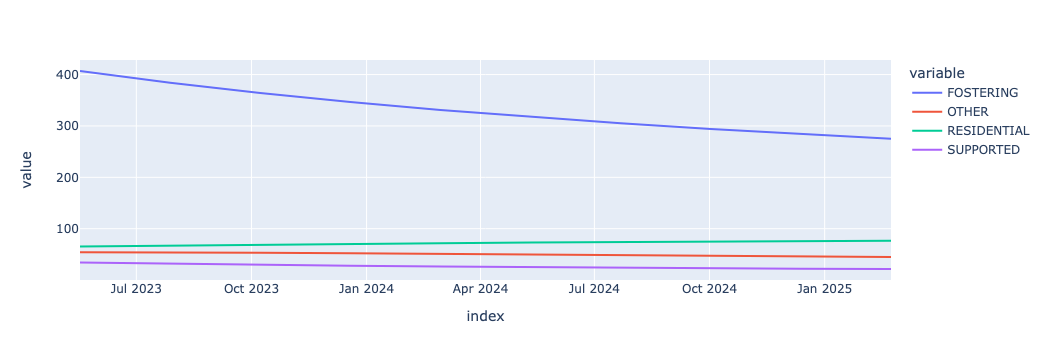

In [37]:
predictor = ModelPredictor(population=stock, transition_rates=transition_rates, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=10, step_days=72)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()

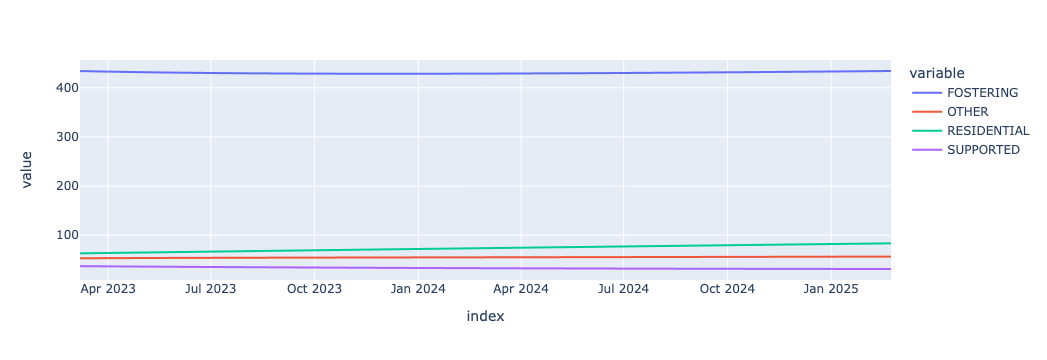

In [12]:
predictor = ModelPredictor(population=stock, transition_rates=transition_rates, transition_numbers=daily_entrants)
forecast = predictor.predict(steps=720, step_days=1)
forecast.columns = pd.MultiIndex.from_tuples(forecast.columns)
forecast = forecast.fillna(0).groupby(level=1, axis=1).sum()

fig = forecast.plot()
fig.show()